## Модели классификации для нескольких классов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка данных

In [2]:
df = pd.read_csv('patient_churn_dataset.csv')

In [3]:
df

,PatientID,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,...,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,C20000,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,...,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,C20001,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,...,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,C20002,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,...,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,C20003,65,Male,FL,118,General Practice,Private,10,3,135,...,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,C20004,18,Female,CA,70,Cardiology,Medicaid,5,4,696,...,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,C21995,31,Male,NC,78,Internal Medicine,Medicare,8,2,180,...,3.9,1.8,2.4,2.9,268,0,1,0,42.6,1
1996,C21996,45,Female,GA,69,Internal Medicine,Private,6,4,352,...,4.2,2.8,3.5,4.6,1257,1,0,3,15.4,1
1997,C21997,37,Male,NC,91,Family Medicine,Medicare,9,4,494,...,3.9,2.7,3.0,2.7,50,0,1,3,2.6,0
1998,C21998,69,Female,NY,5,Internal Medicine,Private,3,0,315,...,1.7,3.2,3.6,4.2,848,0,0,1,38.8,1


In [4]:
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'State', 'Tenure_Months', 'Specialty',
       'Insurance_Type', 'Visits_Last_Year', 'Missed_Appointments',
       'Days_Since_Last_Visit', 'Last_Interaction_Date',
       'Overall_Satisfaction', 'Wait_Time_Satisfaction', 'Staff_Satisfaction',
       'Provider_Rating', 'Avg_Out_Of_Pocket_Cost', 'Billing_Issues',
       'Portal_Usage', 'Referrals_Made', 'Distance_To_Facility_Miles',
       'Churned'],
      dtype='object')


Данные содержат следующие столбцы:

- PatientID - уникальный идентификатор пациента
- Age - возраст пациента
- Gender - пол пациента
- State - штат/регион проживания пациента
- Tenure_Months - количество месяцев с момента регистрации пациента
- Specialty - медицинская специализация/отделение
- Insurance_Type - тип страховки/медицинского страхования
- Visits_Last_Year - количество визитов за последний год
- Missed_Appointments - количество пропущенных назначений
- Days_Since_Last_Visit - дней с момента последнего визита
- Last_Interaction_Date - дата последнего взаимодействия
- Overall_Satisfaction - общая удовлетворенность обслуживанием
- Wait_Time_Satisfaction - удовлетворенность временем ожидания
- Staff_Satisfaction - удовлетворенность персоналом
- Provider_Rating - оценка поставщика услуг/врача
- Avg_Out_Of_Pocket_Cost - средние личные расходы (не покрываемые страховкой)
- Billing_Issues - наличие проблем с выставлением счетов
- Portal_Usage - использование пациентом онлайн-портала
- Referrals_Made - количество направлений/рекомендаций
- Distance_To_Facility_Miles - расстояние до медицинского учреждения (в милях)
- Churned - целевая переменная: отток пациента (1 - ушел, 0 - остался)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   Gender                      2000 non-null   object 
 3   State                       2000 non-null   object 
 4   Tenure_Months               2000 non-null   int64  
 5   Specialty                   2000 non-null   object 
 6   Insurance_Type              2000 non-null   object 
 7   Visits_Last_Year            2000 non-null   int64  
 8   Missed_Appointments         2000 non-null   int64  
 9   Days_Since_Last_Visit       2000 non-null   int64  
 10  Last_Interaction_Date       2000 non-null   object 
 11  Overall_Satisfaction        2000 non-null   float64
 12  Wait_Time_Satisfaction      2000 non-null   float64
 13  Staff_Satisfaction          2000 

In [6]:
df.describe()

,Age,Tenure_Months,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.856500,60.733500,7.614000,2.028000,366.130000,3.255000,3.289900,3.525900,3.736100,836.544000,0.078500,0.206000,1.483500,25.167400,0.683500
std,15.836487,35.111293,4.672143,1.699312,212.890277,1.008595,1.009062,0.871613,0.733748,589.031896,0.269024,0.404532,1.100151,13.948284,0.465227
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.500000,1.500000,2.000000,2.500000,20.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,41.000000,30.000000,4.000000,0.000000,180.000000,2.400000,2.400000,2.775000,3.100000,326.000000,0.000000,0.000000,1.000000,12.800000,0.000000
50%,54.000000,60.000000,8.000000,2.000000,363.000000,3.200000,3.300000,3.500000,3.800000,716.000000,0.000000,0.000000,1.000000,25.000000,1.000000
75%,65.000000,92.250000,12.000000,3.000000,550.250000,4.100000,4.100000,4.300000,4.400000,1368.250000,0.000000,0.000000,2.000000,37.200000,1.000000
max,90.000000,120.000000,15.000000,5.000000,730.000000,5.000000,5.000000,5.000000,5.000000,1999.000000,1.000000,1.000000,3.000000,50.000000,1.000000


In [7]:
df = df.drop(['PatientID'], axis=1)

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
consumption_order = {
    'Male': 0,
    'Female': 1
}

df['Gender'] = df['Gender'].map(consumption_order)

In [10]:
df['State'].unique()

array(['PA', 'GA', 'MI', 'FL', 'CA', 'NY', 'TX', 'OH', 'IL', 'NC'],
      dtype=object)

In [11]:
l = LabelEncoder()
df['State'] = l.fit_transform(df['State'])

In [12]:
mapping = dict(zip(l.classes_, l.transform(l.classes_)))
print("Соответствие категорий:")
for category, code in mapping.items():
    print(f"{category}: {code}")

Соответствие категорий:
CA: 0
FL: 1
GA: 2
IL: 3
MI: 4
NC: 5
NY: 6
OH: 7
PA: 8
TX: 9


In [13]:
df['Specialty'].unique()

array(['Pediatrics', 'Internal Medicine', 'General Practice',
       'Cardiology', 'Orthopedics', 'Neurology', 'Family Medicine'],
      dtype=object)

In [14]:
df['Specialty'] = l.fit_transform(df['Specialty'])

In [15]:
mapping = dict(zip(l.classes_, l.transform(l.classes_)))
print("Соответствие категорий:")
for category, code in mapping.items():
    print(f"{category}: {code}")

Соответствие категорий:
Cardiology: 0
Family Medicine: 1
General Practice: 2
Internal Medicine: 3
Neurology: 4
Orthopedics: 5
Pediatrics: 6


In [16]:
df['Insurance_Type'].unique()

array(['Medicaid', 'Self-Pay', 'Private', 'Medicare'], dtype=object)

In [17]:
df['Insurance_Type'] = l.fit_transform(df['Insurance_Type'])

In [18]:
mapping = dict(zip(l.classes_, l.transform(l.classes_)))
print("Соответствие категорий:")
for category, code in mapping.items():
    print(f"{category}: {code}")

Соответствие категорий:
Medicaid: 0
Medicare: 1
Private: 2
Self-Pay: 3


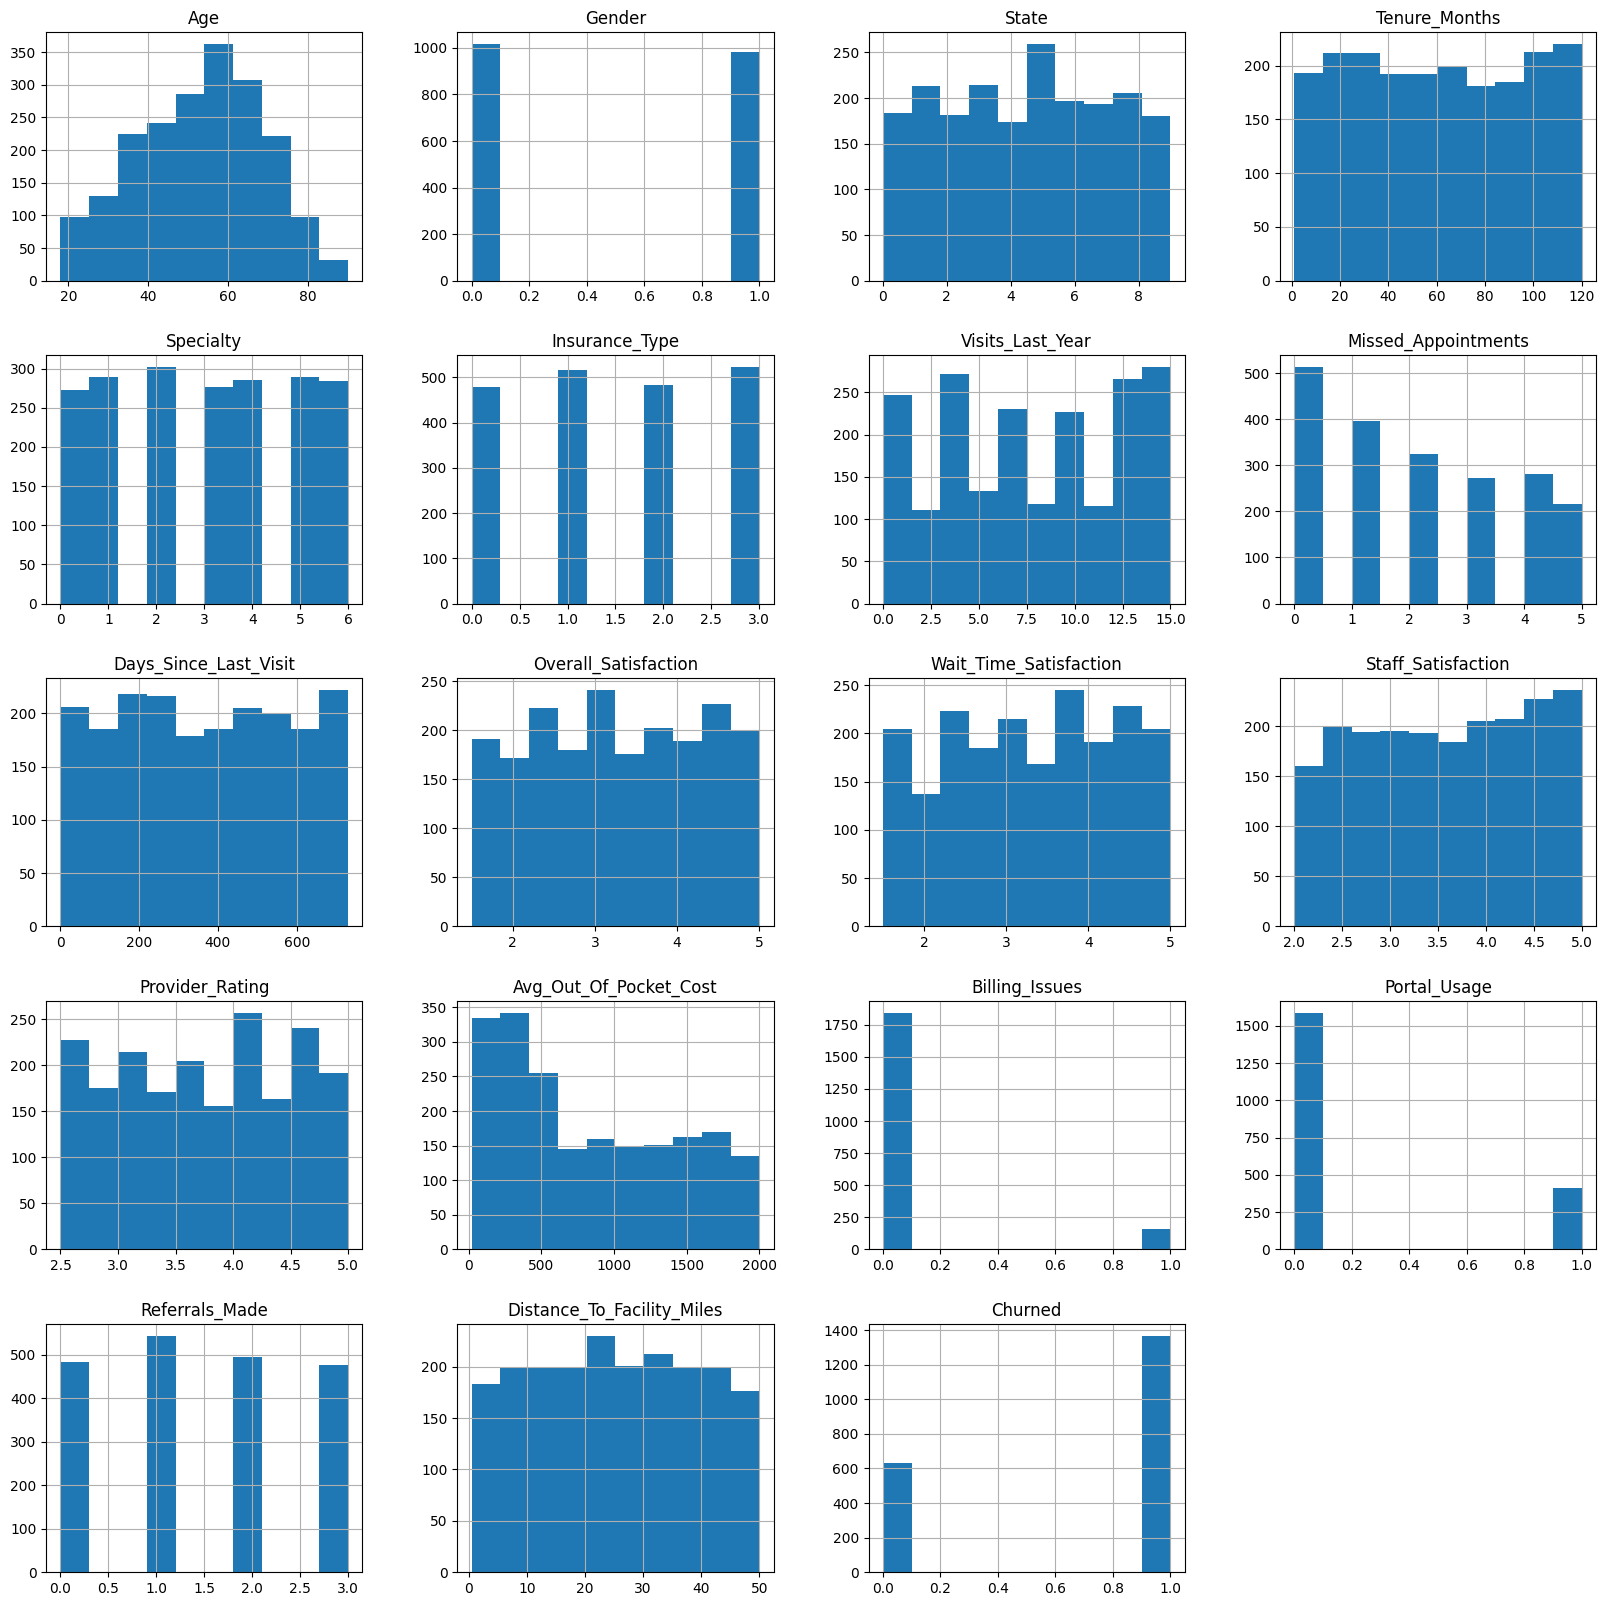

In [19]:
df.hist(figsize=(20,20));

In [20]:
# plt.figure(figsize=(8,6))
# sns.pairplot(df)

In [21]:
df.head()

,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,Last_Interaction_Date,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,41,1,8,62,6,0,1,0,564,2024-07-05,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,43,1,2,44,3,3,7,4,254,2025-05-11,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,21,0,4,120,3,0,15,5,89,2025-10-23,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,65,0,1,118,2,2,10,3,135,2025-09-07,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,18,1,0,70,0,0,5,4,696,2024-02-24,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1


<Axes: xlabel='Churned', ylabel='Density'>

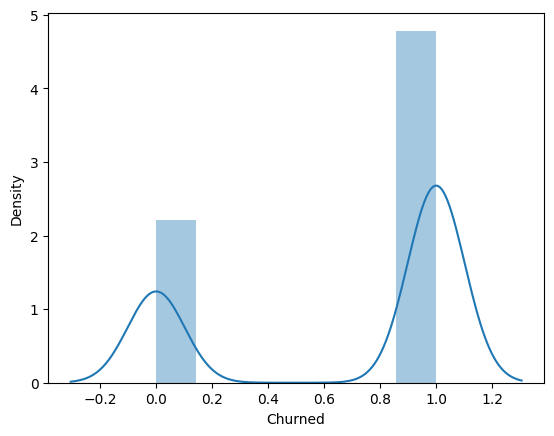

In [22]:
sns.distplot(df['Churned'])

<Axes: >

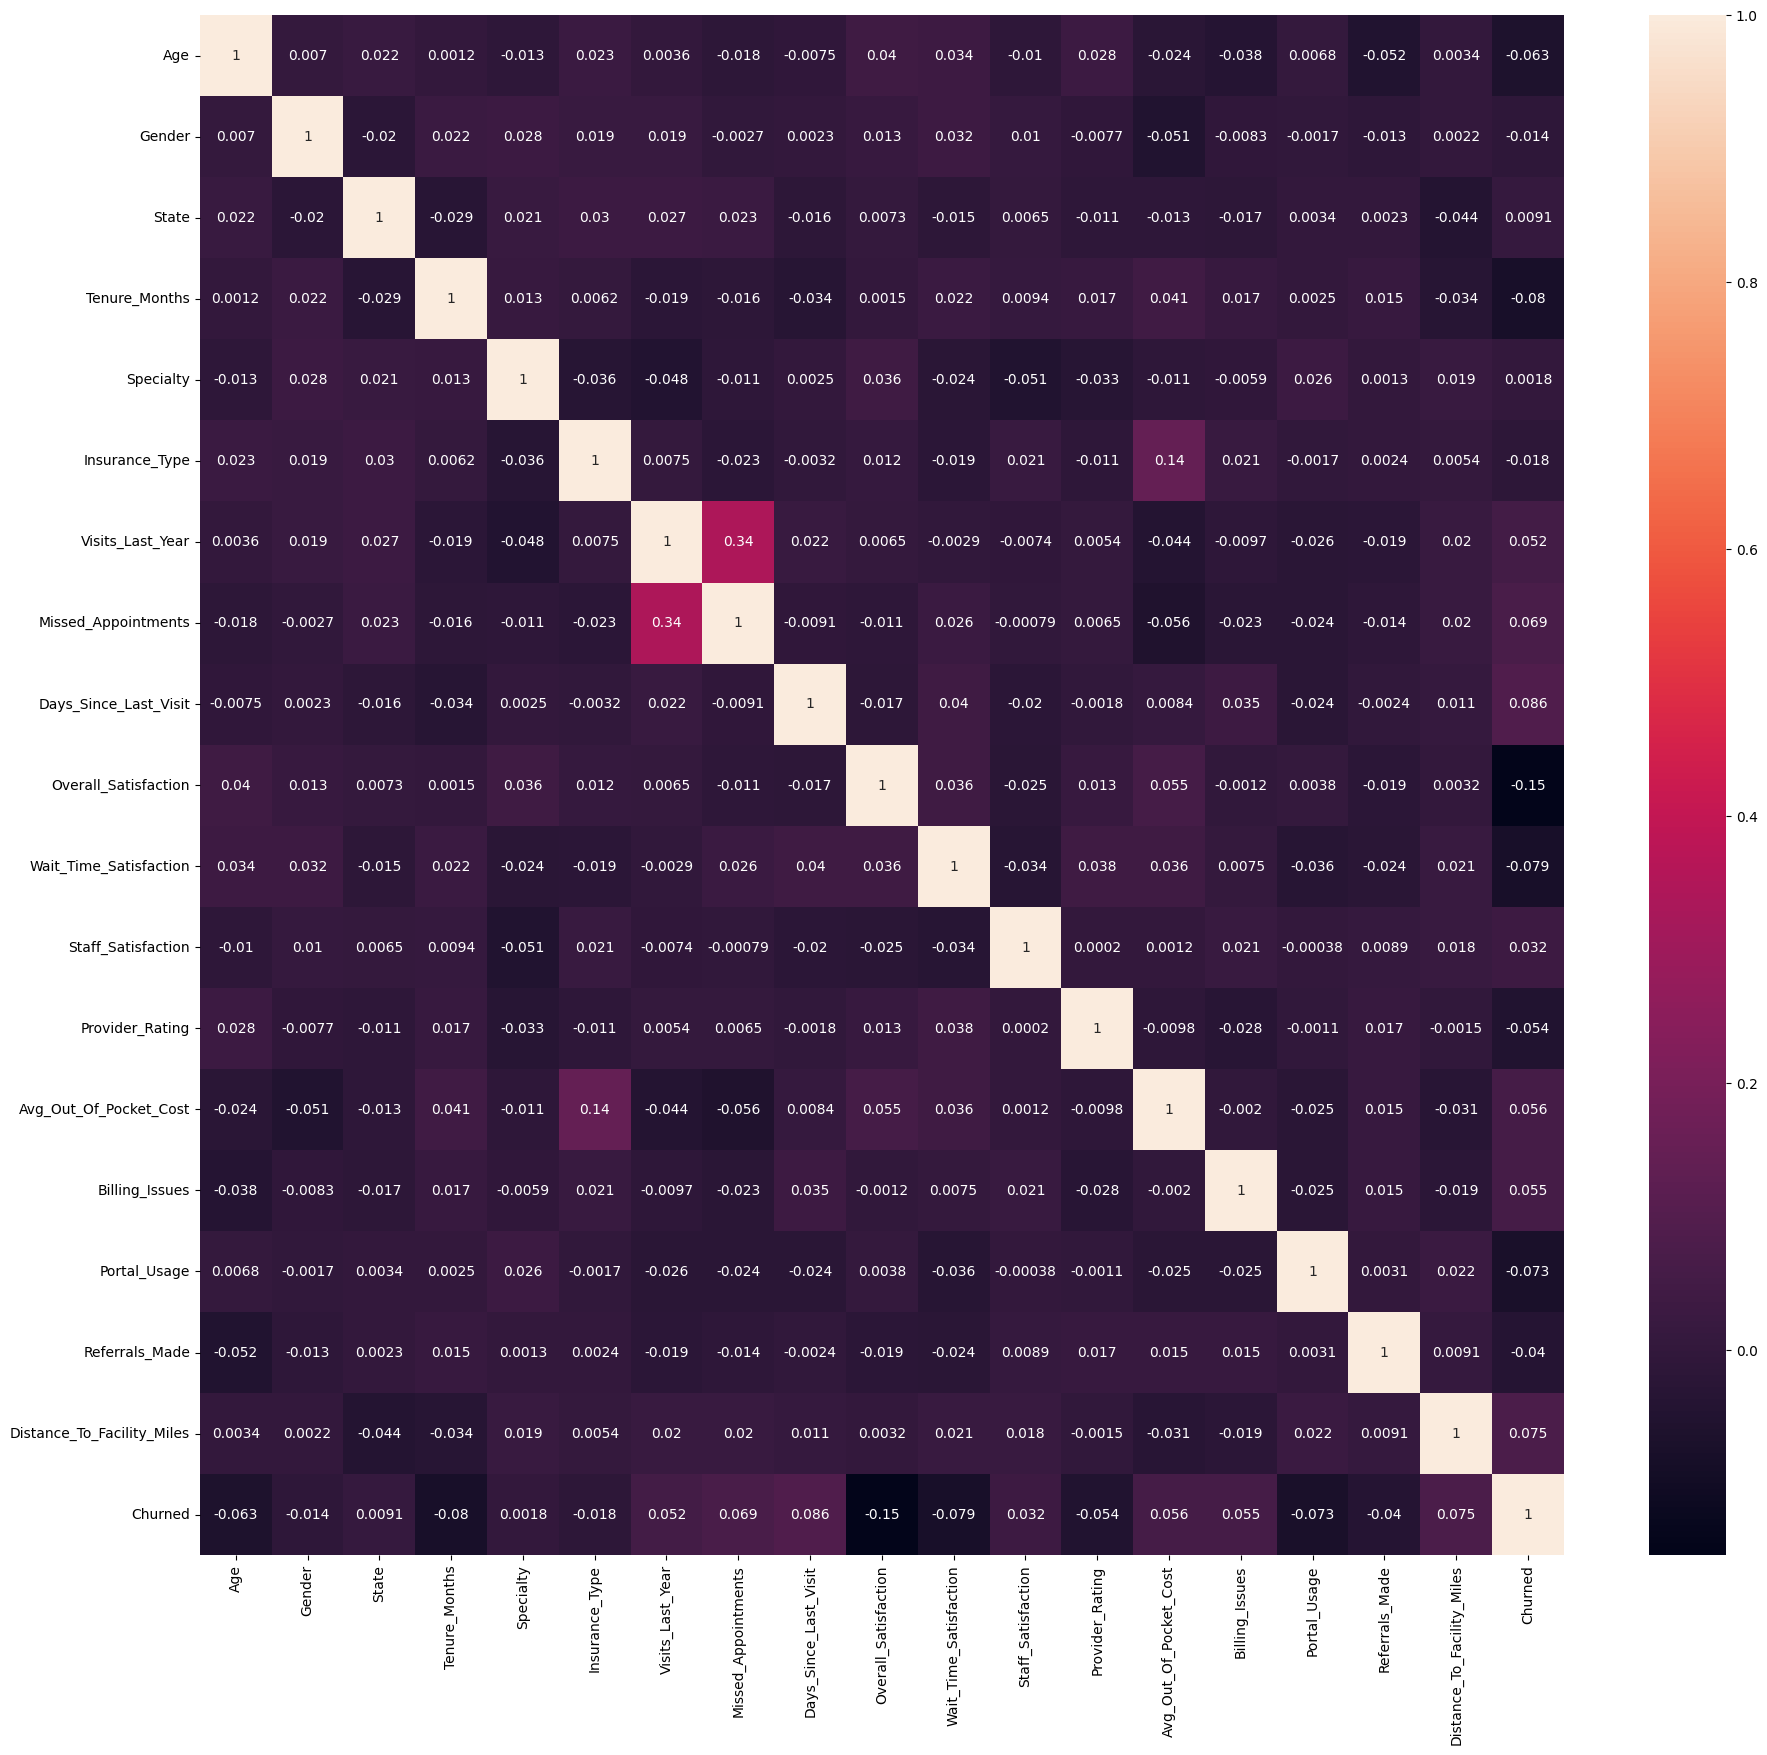

In [23]:
plt.figure(figsize=(22, 20))
sns.heatmap(df[['Age', 'Gender', 'State', 'Tenure_Months', 'Specialty',
       'Insurance_Type', 'Visits_Last_Year', 'Missed_Appointments',
       'Days_Since_Last_Visit',
       'Overall_Satisfaction', 'Wait_Time_Satisfaction', 'Staff_Satisfaction',
       'Provider_Rating', 'Avg_Out_Of_Pocket_Cost', 'Billing_Issues',
       'Portal_Usage', 'Referrals_Made', 'Distance_To_Facility_Miles',
       'Churned']].corr(), annot=True)

### Обучение классификатора

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
selected_features = [
    'Age', 'Gender', 'Tenure_Months', 'Specialty',
    'Insurance_Type', 'Visits_Last_Year', 'Missed_Appointments',
    'Days_Since_Last_Visit', 'Overall_Satisfaction', 
    'Wait_Time_Satisfaction', 'Staff_Satisfaction',
    'Provider_Rating', 'Avg_Out_Of_Pocket_Cost', 'Billing_Issues',
    'Portal_Usage', 'Referrals_Made', 'Distance_To_Facility_Miles'
]

X = df[selected_features]
y = df['Churned']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=19,
    stratify=y
)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print(f"Веса классов: {class_weight_dict}")

Веса классов: {0: 1.580135440180587, 1: 0.7314524555903866}


In [28]:
input_dim = X_train_scaled.shape[1]
print(f"Количество признаков: {input_dim}")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(input_dim,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Количество признаков: 17


In [29]:
early_stop = EarlyStopping(
    monitor='val_auc',
    patience=15,
    restore_best_weights=True,
    min_delta=0.0001,
    mode='max'
)

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', 
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [31]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop],
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/200
44/44 [==============================] - 2s 11ms/step - loss: 0.8227 - accuracy: 0.5264 - precision: 0.6919 - recall: 0.5538 - val_loss: 0.6745 - val_accuracy: 0.6033 - val_precision: 0.7443 - val_recall: 0.6390
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.7602 - accuracy: 0.5614 - precision: 0.7219 - recall: 0.5831 - val_loss: 0.6582 - val_accuracy: 0.6300 - val_precision: 0.7207 - val_recall: 0.7488
Epoch 3/200
44/44 [==============================] - 0s 5ms/step - loss: 0.7614 - accuracy: 0.5279 - precision: 0.7133 - recall: 0.5172 - val_loss: 0.6523 - val_accuracy: 0.6450 - val_precision: 0.7285 - val_recall: 0.7659
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.7162 - accuracy: 0.5786 - precision: 0.7424 - recall: 0.5873 - val_loss: 0.6514 - val_accuracy: 0.6417 - val_precision: 0.7481 - val_recall: 0.7171
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5786 - precis

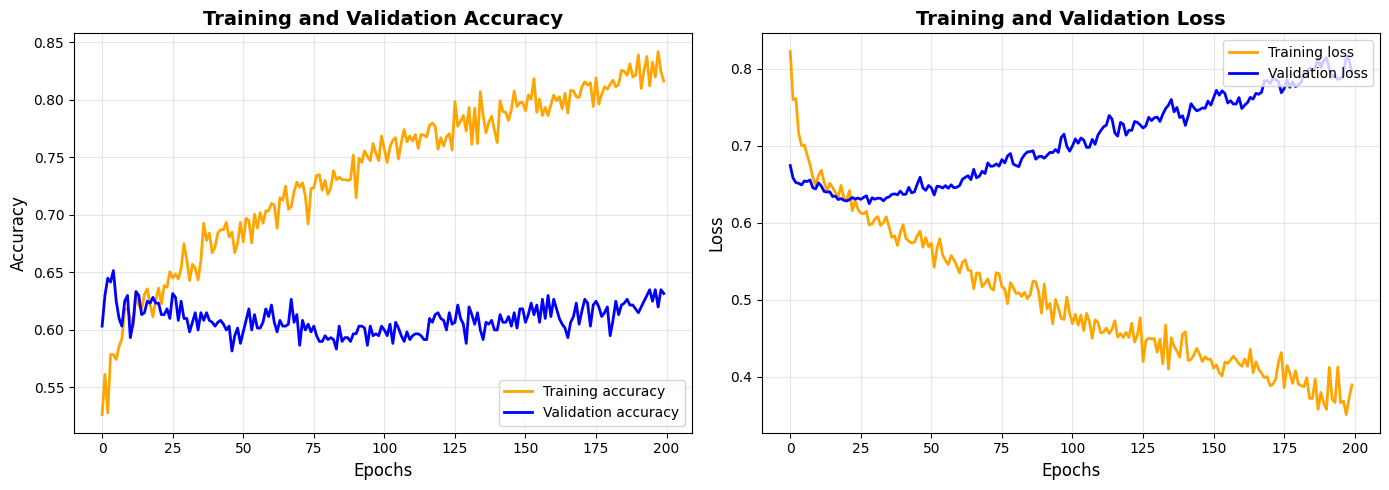

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(epochs, acc, 'orange', label='Training accuracy', linewidth=2)
ax1.plot(epochs, val_acc, 'blue', label='Validation accuracy', linewidth=2)
ax1.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

ax2.plot(epochs, loss, 'orange', label='Training loss', linewidth=2)
ax2.plot(epochs, val_loss, 'blue', label='Validation loss', linewidth=2)
ax2.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [33]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

19/19 [==============================] - 0s 1ms/step


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

print("\nОтчет классификации:")
print(classification_report(y_test, y_pred))


Отчет классификации:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       190
           1       0.74      0.72      0.73       410

    accuracy                           0.63       600
   macro avg       0.58      0.58      0.58       600
weighted avg       0.64      0.63      0.63       600



## KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [36]:
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",2
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [37]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4583333333333333

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.55      0.39       190
           1       0.67      0.41      0.51       410

    accuracy                           0.46       600
   macro avg       0.49      0.48      0.45       600
weighted avg       0.55      0.46      0.47       600



## Стэкинг

In [40]:
from sklearn.linear_model import RidgeCV, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

In [41]:
%%time
sc = StackingClassifier([('rf', RandomForestClassifier()), ('f', GradientBoostingClassifier())], final_estimator=LogisticRegression())
sc.fit(X_train, y_train)
sc_pred = sc.predict(X_test)

CPU times: total: 3.75 s
Wall time: 3.89 s


In [42]:
print(classification_report(y_test, sc_pred))

              precision    recall  f1-score   support

           0       0.53      0.04      0.08       190
           1       0.69      0.98      0.81       410

    accuracy                           0.69       600
   macro avg       0.61      0.51      0.44       600
weighted avg       0.64      0.69      0.58       600



## Вывод

В результате работы был изучен набор данных о пациентах, закодированы нужные признаки, проведен анализ и построены графики для наглядности. Было обучего 3 модели: Нейронная сеть, KNeighborsClassifier, Стэкинг. В результате обучения лучшие показаети показала модель нейронной сети. Она показывает наиболее сбалансированные результаты для обоих классов. Стекинг, несмотря на более высокий accuracy, практически бесполезен для задачи предсказания оттока, так как почти не обнаруживает его случаи.